В данной задаче вам предстоит решить задачу классификации изображений – отделить изображения кошек от изображений собак, используя классификацию с мягким зазором и параметром $C$. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os

In [ ]:
local_zip = '/content/drive/MyDrive/train_task.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/')
zip_ref.close()

In [ ]:
local_zip = '/content/drive/MyDrive/test_task.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/')
zip_ref.close()

In [ ]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [ ]:
imagePaths = sorted(list(paths.list_images('/content/drive/MyDrive/train')))
data = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    data.append(hist)
    labels.append(label)

0


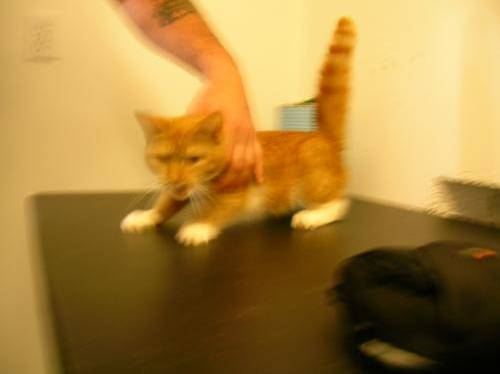

In [ ]:
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[0])
Image(filename=imagePaths[0])

Обучите классификатор LinearSVC() при C = 1.47 и random_state = 4 на предложенной выборке. Используйте параметр random_state = 4 для разделения выборки на тренировочную и тестовую части, в отношении 75/25 функции train_test_split().

In [ ]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data), labels, test_size=0.25, random_state=4)
model = LinearSVC(random_state = 4, C = 1.47)
model.fit(trainData, trainLabels)

LinearSVC(C=1.47, random_state=4)

Составьте матрицу ошибок для каждого класса, рассчитайте точность (precision) и полноту (recall). Затем вычислите значение метрики $F_1$ для каждого класса:

In [ ]:
predictions = model.predict(testData)
print(classification_report(testLabels, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

         cat       0.56      0.68      0.61       127
         dog       0.58      0.46      0.51       123

    accuracy                           0.57       250
   macro avg       0.57      0.57      0.56       250
weighted avg       0.57      0.57      0.56       250



In [ ]:
from sklearn.metrics import f1_score
predictions = model.predict(testData)
f1_score(testLabels, predictions, average='macro')

0.5616883116883117

Введите значение коэффициента $\theta_{123}$ построенной гиперплоскости.

In [ ]:
model.coef_[0][123]

3.1052456830668075e-05

Выполните предсказание для изображений, указанных ниже. Введите назначенный класс: 0 или 1.

In [ ]:
singleImage = cv2.imread('drive/MyDrive/test/dog.1013.jpg')
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = model.predict(histt2)
prediction

array([1])